In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Libraries for data pre-processing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import pickle

In [2]:
deal_df = pd.read_csv('1322_deals.csv')
# clients_df = pd.read_csv('116_clients.csv')
# employees_df = pd.read_csv('116_employees.csv')

In [3]:
deal_df

,Deal ID,Product,Country,Client (Person),Client (Company),Bank Employee Contact,Start Date,End Date,Deal Type,Match Status
0,1,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Melissa Nash,6/4/2023,5/7/2023,Private,Fail
1,2,Wealth Management,Nigeria,Heather Dominguez,Robbins-Thomas,Crystal Cabrera,4/6/2023,2/9/2023,Private,Fail
2,3,Precious Metals,Cameroon,Jay Burns,"Patterson, Harmon and Butler",Janet Garcia,25/4/2023,24/7/2023,Public,Fail
3,4,Residential Property,Bahrain,Samantha Robertson,Booker Ltd,Stacey Barnes,2/2/2023,3/5/2023,Private,Success
4,5,Chemicals,Jamaica,Melanie Hall,Atkins-Carrillo,Jason Mahoney,8/6/2022,6/9/2022,Public,Success
...,...,...,...,...,...,...,...,...,...,...
995,996,Pharmaceuticals,India,Eric Lee,Valdez Ltd,Kelly Foster,27/2/2023,28/5/2023,Public,Success
996,997,Internet Service Providers,Costa Rica,Courtney Turner,Thomas-Murphy,Mason Fuller,24/5/2022,22/8/2022,Private,Success
997,998,Health Products,Singapore,Janet Jarvis,"Carrillo, Le and Burns",Thomas Steele,9/8/2023,7/11/2023,Public,Success
998,999,Universities,Uruguay,Emily Miller,Smith-Jones,Kimberly Scott,25/7/2022,23/10/2022,Public,Success


In [4]:
#columns to encode

to_encode = ["Product","Country","Deal Type", "Match Status","Bank Employee Contact","Client (Person)", "Client (Company)"]

for column in deal_df.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(deal_df[column].astype(str))
        deal_df[column]=le.transform(deal_df[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)


{'Airlines': 0, 'Automobile Manufacturers': 1, 'Baby Products': 2, 'Banking Services': 3, 'Cable Companies': 4, 'Car': 5, 'Chemicals': 6, 'Clothing': 7, 'Commercial Property': 8, 'Computer': 9, 'Electricity Providers': 10, 'Electronics': 11, 'Food & Beverages': 12, 'Furniture': 13, 'Health Products': 14, 'Home Appliances': 15, 'Insurance': 16, 'Internet Service Providers': 17, 'Investment Management': 18, 'Jewelry': 19, 'Mining Equipment': 20, 'Mobile Phone Operators': 21, 'Movie Studios': 22, 'Music Labels': 23, 'Musical Instruments': 24, 'Natural Gas Providers': 25, 'Office Supplies': 26, 'Oil & Gas': 27, 'Online Education Platforms': 28, 'Outdoor Gear': 29, 'Pet Supplies': 30, 'Pharmaceuticals': 31, 'Precious Metals': 32, 'REITs': 33, 'Railways': 34, 'Renewable Energy': 35, 'Residential Property': 36, 'Schools': 37, 'Shipping Companies': 38, 'Sports Equipment': 39, 'Streaming Services': 40, 'Telecom Equipment Manufacturers': 41, 'Television Networks': 42, 'Textbook Publishers': 43, 

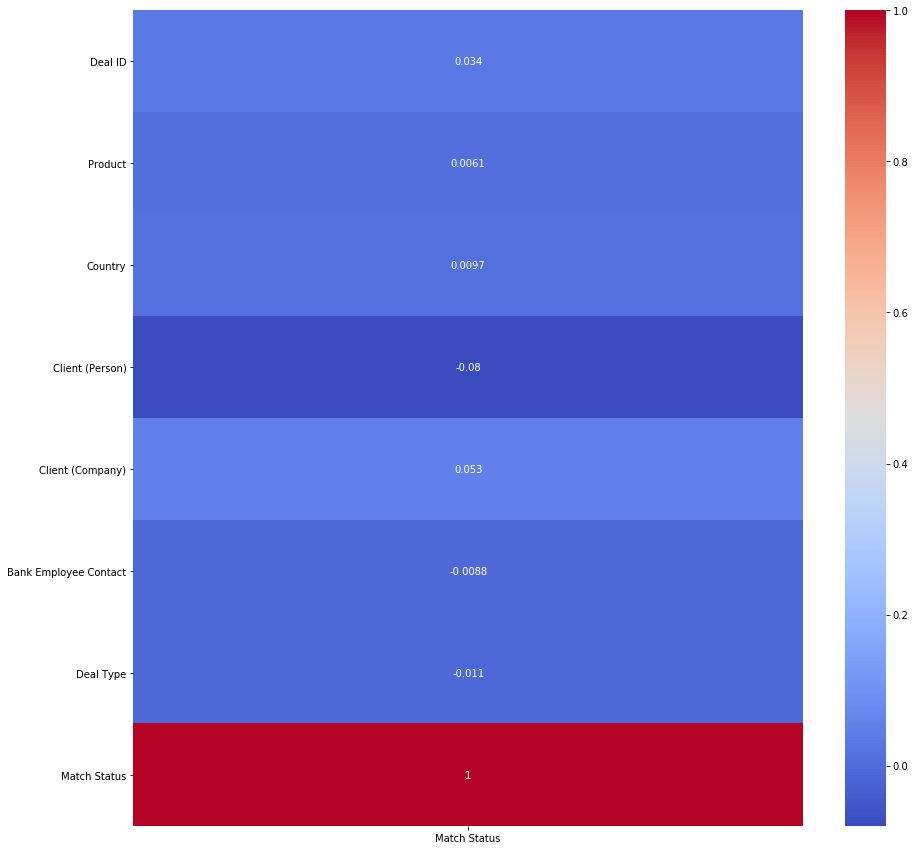

In [5]:
corr = deal_df.corr()
plt.figure(figsize = (15,15))
# Draw heatmap
sns.heatmap(corr[['Match Status']],annot=True,cmap='coolwarm')

plt.show()

In [6]:
column_list=list(deal_df.columns)
column_list.remove('Deal ID')
# column_list.remove('Client (Person)')
# column_list.remove('Client (Company)')
# column_list.remove('Bank Employee Contact')
column_list.remove('Start Date')
column_list.remove('End Date')
column_list.remove('Match Status')

In [7]:
column_list

['Product',
 'Country',
 'Client (Person)',
 'Client (Company)',
 'Bank Employee Contact',
 'Deal Type']

In [8]:
# features
X = deal_df[column_list]

# target
y = deal_df['Match Status']

In [9]:
from sklearn.model_selection import train_test_split
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [10]:
# Your code here
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 6969, random_state=69)
random_forest.fit(X_train, y_train)

rf_predictions = random_forest.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rmse

0.7071067811865476

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = metrics.precision_score(y_test, rf_predictions)
rf_recall = metrics.recall_score(y_test, rf_predictions)
rf_f1_score = metrics.f1_score(y_test, rf_predictions)

print("Accuracy:", rf_accuracy)
print("Precision:",rf_precision)
print("Recall:",rf_recall)
print("F-score:",rf_f1_score)

Accuracy: 0.5
Precision: 0.46464646464646464
Recall: 0.4946236559139785
F-score: 0.47916666666666663


In [13]:
print("RF", classification_report(y_test, rf_predictions))
RF_matrix = confusion_matrix(y_test, rf_predictions)

RF               precision    recall  f1-score   support

           0       0.53      0.50      0.52       107
           1       0.46      0.49      0.48        93

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [80]:
test = pd.read_excel('test_data.xlsx')

In [68]:
transformed_test = test

In [69]:
to_encode = ["Product","Country","Deal Type", "Match Status","Bank Employee Contact","Client (Person)", "Client (Company)"]
transformed_test = transformed_test.fillna('na')
for column in transformed_test.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(transformed_test[column].astype(str))
        transformed_test[column]=le.transform(transformed_test[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'Airlines': 0, 'Automobile Manufacturers': 1, 'Baby Products': 2, 'Banking Services': 3, 'Commercial Property': 4, 'Electricity Providers': 5, 'Electronics': 6, 'Food & Beverages': 7, 'Furniture': 8, 'Health Products': 9, 'Home Appliances': 10, 'Mining Equipment': 11, 'Movie Studios': 12, 'Music Labels': 13, 'Office Supplies': 14, 'Oil & Gas': 15, 'Online Education Platforms': 16, 'Outdoor Gear': 17, 'Pet Supplies': 18, 'Pharmaceuticals': 19, 'Precious Metals': 20, 'REITs': 21, 'Residential Property': 22, 'Shipping Companies': 23, 'Streaming Services': 24, 'Textbook Publishers': 25, 'Tools': 26, 'Video Game Companies': 27}
{'Australia': 0, 'Bahrain': 1, 'Cameroon': 2, 'Canada': 3, 'China': 4, 'Costa Rica': 5, 'Germany': 6, 'Hungary': 7, 'India': 8, 'Ireland': 9, 'Jamaica': 10, 'Japan': 11, 'Malaysia': 12, 'Mexico': 13, 'Nigeria': 14, 'Singapore': 15, 'United Kingdom': 16, 'Uruguay': 17}
{'Amanda Leblanc': 0, 'Andrew Chase': 1, 'Andrew Morris': 2, 'Ashley Cochran': 3, 'Caleb Garcia': 4

In [70]:
new_test=transformed_test.drop(columns = ['Start Date', 'End Date','Deal ID'])

In [71]:
new_output = random_forest.predict(new_test)

In [83]:
test['Matching Status'] = new_output.tolist()

In [84]:
test

,Deal ID,Product,Country,Client (Person),Client (Company),Bank Employee Contact,Start Date,End Date,Deal Type,Matching Status
0,1,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Melissa Nash,2023-04-06,2023-07-05,Private,1
1,2,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Crystal Cabrera,2023-06-04,2023-09-02,Private,1
2,3,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Janet Garcia,2023-04-25,2023-07-24,Public,1
3,4,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Stacey Barnes,2023-02-02,2023-05-03,Private,1
4,5,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Jason Mahoney,2022-06-08,2022-09-06,Public,1
5,6,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Katelyn James,2023-03-03,2023-06-01,Private,1
6,7,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Suzanne Walsh,2022-05-05,2022-08-03,Private,1
7,8,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Kelly Foster,2023-05-16,2023-08-14,Public,1
8,9,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Laura Butler,2023-02-10,2023-05-11,Private,1
9,10,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Kaitlin Campbell,2023-10-02,2023-12-31,Private,1


In [85]:
test= test.replace(0, 'Not Matching')

In [86]:
test= test.replace(1, 'Matching')

In [87]:
test

,Deal ID,Product,Country,Client (Person),Client (Company),Bank Employee Contact,Start Date,End Date,Deal Type,Matching Status
0,Matching,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Melissa Nash,2023-04-06,2023-07-05,Private,Matching
1,2,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Crystal Cabrera,2023-06-04,2023-09-02,Private,Matching
2,3,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Janet Garcia,2023-04-25,2023-07-24,Public,Matching
3,4,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Stacey Barnes,2023-02-02,2023-05-03,Private,Matching
4,5,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Jason Mahoney,2022-06-08,2022-09-06,Public,Matching
5,6,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Katelyn James,2023-03-03,2023-06-01,Private,Matching
6,7,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Suzanne Walsh,2022-05-05,2022-08-03,Private,Matching
7,8,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Kelly Foster,2023-05-16,2023-08-14,Public,Matching
8,9,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Laura Butler,2023-02-10,2023-05-11,Private,Matching
9,10,Movie Studios,Australia,Renee Bautista,Thomas-Walter,Kaitlin Campbell,2023-10-02,2023-12-31,Private,Matching


In [79]:
with open(r'randomforest.pickle', 'wb') as f:
    pickle.dump(random_forest, f)